In [1]:
# Crawl the data directory
import os

data_dir = r'..\data\baseline'

data_files = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith('.mat')]
# loop over the files

import scipy.io

All_network_X = []
All_network_y = []

for f in data_files[:10]:
    data = scipy.io.loadmat(f)
    test_x = data['test_x']
    test_out = data['test_out']

    All_network_X.append(test_x)
    All_network_y.append(test_out)

import numpy as np

All_network_X = np.array(All_network_X)
All_network_y = np.array(All_network_y)

# Last timestep energy without re-shaping with Y

In [ ]:
import os, sys; sys.path.append(os.path.abspath('../'))
# Importing the required packages
from inspector.rsa import ESM

In [29]:
def get_energy_distance(X, y):
    netrep_metric = ESM(verbose = True)
    ingestion_report = netrep_metric.ingest(X, y, preprcessed = True)
    energy_distance = netrep_metric.score()
    netrep_metric.plot()
    return energy_distance

## Getting all the last timesteps layers

In [30]:
All_network_X.shape

(10, 4, 50, 200, 300)

In [31]:
x = All_network_X[:, :, :, :, -1:]

In [32]:
x = x.reshape(x.shape[:-1])

100%|██████████| 45/45 [06:31<00:00,  8.71s/it]


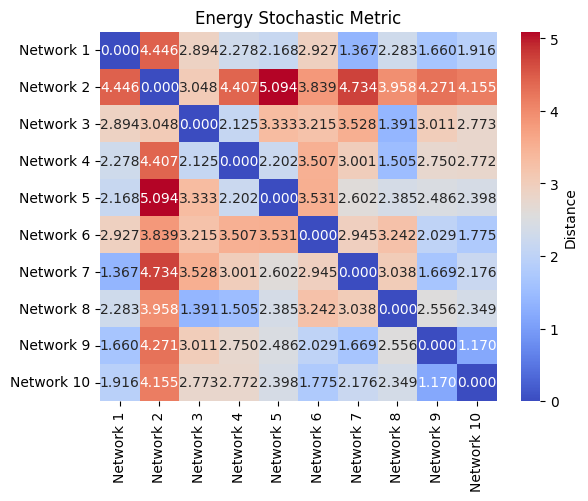

In [33]:
result = get_energy_distance(x, None)

### For some reason Netowrk 2 differs a lot from the others

100%|██████████| 10/10 [01:17<00:00,  7.73s/it]


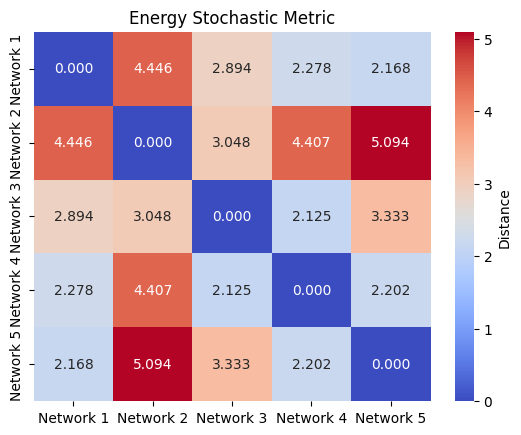

In [27]:
result = get_energy_distance(x, None)

# Last timestep X segrigated according to predicted Y (Average of last 50 y)

In [34]:
All_network_X.shape, All_network_y.shape

((10, 4, 50, 200, 300), (10, 4, 50, 300))

### Inspecting the last 50 y and rest X

In [46]:
# [1 1]
pos_pos = All_network_y[0, 0, :, :]

# [1 -1]
pos_neg = All_network_y[0, 1, :, :]

# [-1 1]
neg_pos = All_network_y[0, 2, :, :]

# [-1 -1]
neg_neg = All_network_y[0, 3, :, :]

In [47]:
print(pos_pos.shape, pos_neg.shape, neg_pos.shape, neg_neg.shape)

(50, 300) (50, 300) (50, 300) (50, 300)


Text(0.5, 1.0, 'neg_neg')

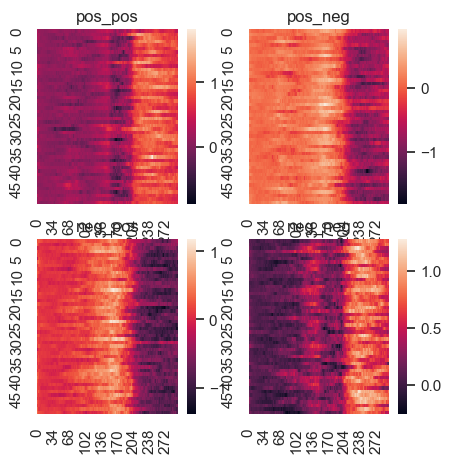

In [55]:
# sns plot all the four
import seaborn as sns
from matplotlib import pyplot as plt

# show this in a grid and title each plot
fig, axes = plt.subplots(2, 2, figsize = (5, 5))

sns.heatmap(pos_pos, ax = axes[0, 0])
axes[0, 0].set_title('pos_pos')

sns.heatmap(pos_neg, ax = axes[0, 1])
axes[0, 1].set_title('pos_neg')

sns.heatmap(neg_pos, ax = axes[1, 0])
axes[1, 0].set_title('neg_pos')

sns.heatmap(neg_neg, ax = axes[1, 1])
axes[1, 1].set_title('neg_neg')

### Now looking into x but only single sample

In [86]:
All_network_X.shape

(10, 4, 50, 200, 300)

In [87]:
x_pos_pos = All_network_X[0, 0, 0, :, :]
x_pos_neg = All_network_X[0, 1, 0, :, :]
x_neg_pos = All_network_X[0, 2, 0, :, :]
x_neg_neg = All_network_X[0, 3, 0, :, :]

Text(0.5, 1.0, 'x_neg_neg')

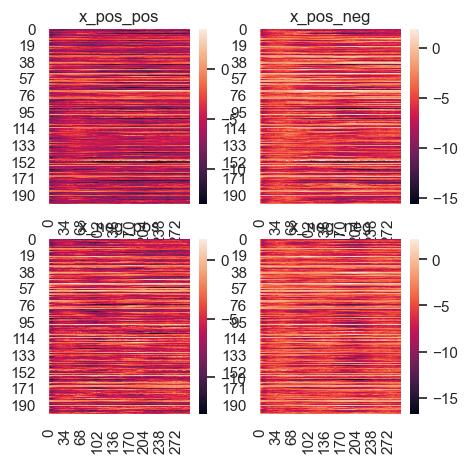

In [88]:
# sns plot all the four in a grid
import seaborn as sns
from matplotlib import pyplot as plt

# show this in a grid and title each plot
fig, axes = plt.subplots(2, 2, figsize = (5, 5))

sns.heatmap(x_pos_pos, ax = axes[0, 0])
axes[0, 0].set_title('x_pos_pos')

sns.heatmap(x_pos_neg, ax = axes[0, 1])
axes[0, 1].set_title('x_pos_neg')

sns.heatmap(x_neg_pos, ax = axes[1, 0])
axes[1, 0].set_title('x_neg_pos')

sns.heatmap(x_neg_neg, ax = axes[1, 1])
axes[1, 1].set_title('x_neg_neg')

In [89]:
x_pos_pos = np.average(x_pos_pos, axis = 0)
x_pos_neg = np.average(x_pos_neg, axis = 0)
x_neg_pos = np.average(x_neg_pos, axis = 0)
x_neg_neg = np.average(x_neg_neg, axis = 0)

In [90]:
print(x_pos_pos.shape, x_pos_neg.shape, x_neg_pos.shape, x_neg_neg.shape)

(300,) (300,) (300,) (300,)


Text(0.5, 1.0, 'x_neg_neg')

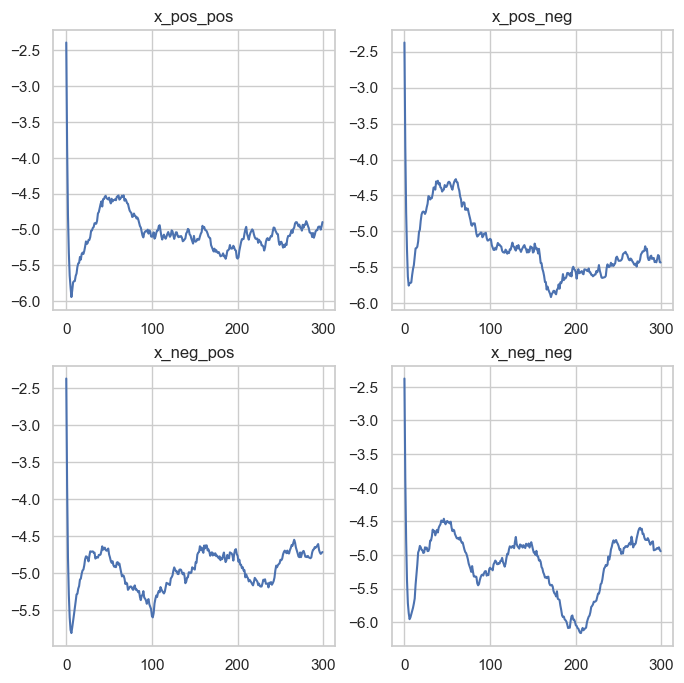

In [98]:
# line plot all the four

import seaborn as sns
from matplotlib import pyplot as plt

# show this in a grid and title each plot
fig, axes = plt.subplots(2, 2, figsize = (8, 8))

sns.lineplot(x = np.arange(0, 300), y = x_pos_pos, ax = axes[0, 0])
axes[0, 0].set_title('x_pos_pos')

sns.lineplot(x = np.arange(0, 300), y = x_pos_neg, ax = axes[0, 1])
axes[0, 1].set_title('x_pos_neg')

sns.lineplot(x = np.arange(0, 300), y = x_neg_pos, ax = axes[1, 0])
axes[1, 0].set_title('x_neg_pos')

sns.lineplot(x = np.arange(0, 300), y = x_neg_neg, ax = axes[1, 1])
axes[1, 1].set_title('x_neg_neg')

Text(0.5, 1.0, 'y_neg_neg')

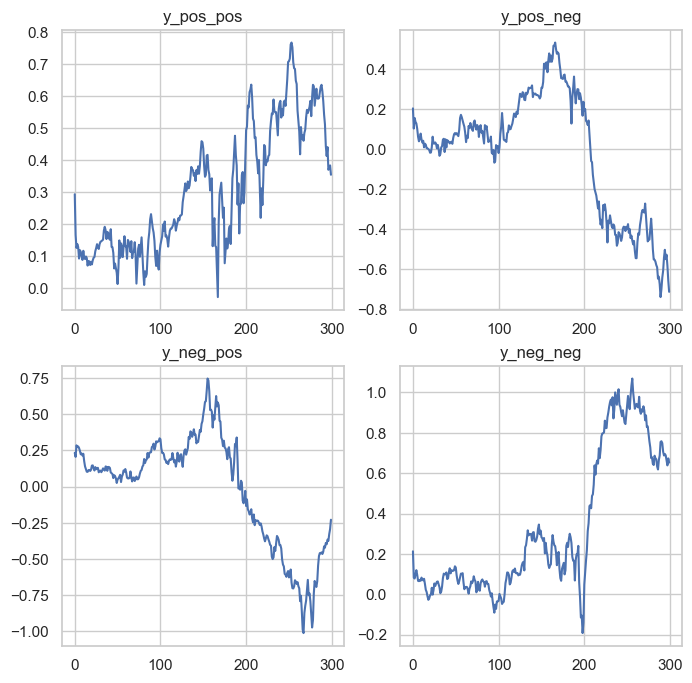

In [96]:
# plot the corsponding y

import seaborn as sns
from matplotlib import pyplot as plt

# show this in a grid and title each plot

fig, axes = plt.subplots(2, 2, figsize = (8, 8))

sns.lineplot(x = np.arange(0, 300), y = All_network_y[0, 0, 0, :], ax = axes[0, 0])
axes[0, 0].set_title('y_pos_pos')

sns.lineplot(x = np.arange(0, 300), y = All_network_y[0, 1, 0, :], ax = axes[0, 1])
axes[0, 1].set_title('y_pos_neg')

sns.lineplot(x = np.arange(0, 300), y = All_network_y[0, 2, 0, :], ax = axes[1, 0])
axes[1, 0].set_title('y_neg_pos')

sns.lineplot(x = np.arange(0, 300), y = All_network_y[0, 3, 0, :], ax = axes[1, 1])
axes[1, 1].set_title('y_neg_neg')




# X and Y of average all samples

In [23]:
y_all_samp_avg = np.average(All_network_y, axis=2)

In [24]:
All_network_X.shape

(10, 4, 50, 200, 300)

In [25]:
x_all_samp_avg = np.average(All_network_X, axis=3)
x_all_samp_avg.shape

(10, 4, 50, 300)

In [26]:
x_all_samp_avg = np.average(x_all_samp_avg, axis=2)
x_all_samp_avg.shape

(10, 4, 300)

Text(0.5, 1.0, 'y_neg_neg')

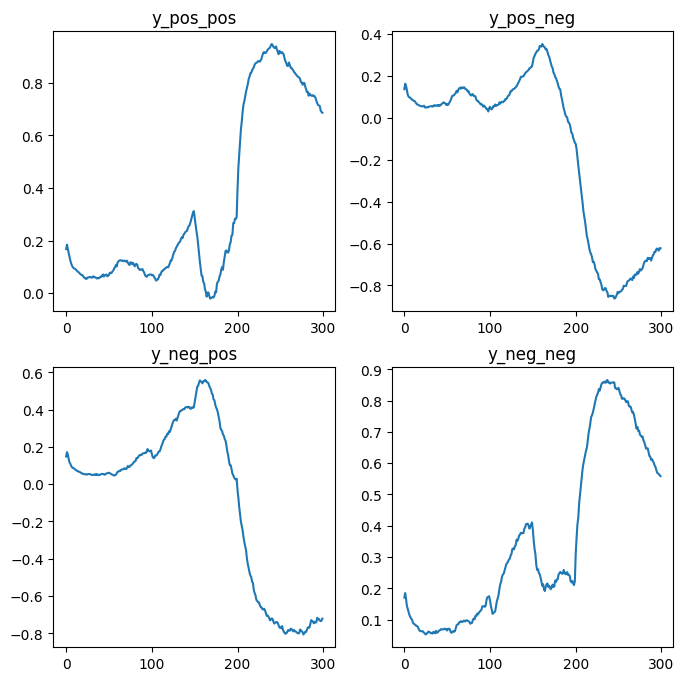

In [27]:
# plot the corsponding y

import seaborn as sns
from matplotlib import pyplot as plt

# show this in a grid and title each plot

fig, axes = plt.subplots(2, 2, figsize = (8, 8))

sns.lineplot(x = np.arange(0, 300), y = y_all_samp_avg[0, 0, :], ax = axes[0, 0])
axes[0, 0].set_title('y_pos_pos')

sns.lineplot(x = np.arange(0, 300), y = y_all_samp_avg[0, 1, :], ax = axes[0, 1])
axes[0, 1].set_title('y_pos_neg')

sns.lineplot(x = np.arange(0, 300), y = y_all_samp_avg[0, 2, :], ax = axes[1, 0])
axes[1, 0].set_title('y_neg_pos')

sns.lineplot(x = np.arange(0, 300), y = y_all_samp_avg[0, 3, :], ax = axes[1, 1])
axes[1, 1].set_title('y_neg_neg')

Text(0.5, 1.0, 'x_neg_neg')

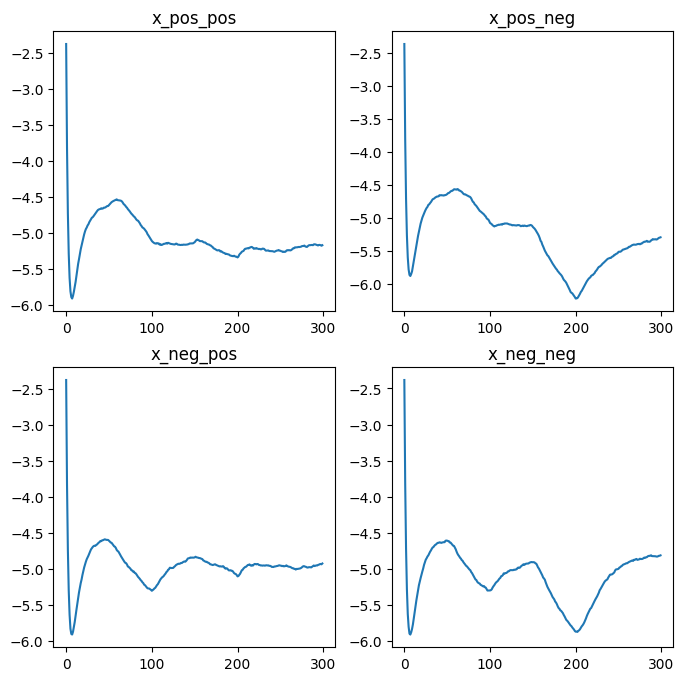

In [28]:
# show this in a grid and title each plot

fig, axes = plt.subplots(2, 2, figsize = (8, 8))

sns.lineplot(x = np.arange(0, 300), y = x_all_samp_avg[0, 0, :], ax = axes[0, 0])
axes[0, 0].set_title('x_pos_pos')

sns.lineplot(x = np.arange(0, 300), y = x_all_samp_avg[0, 1, :], ax = axes[0, 1])
axes[0, 1].set_title('x_pos_neg')

sns.lineplot(x = np.arange(0, 300), y = x_all_samp_avg[0, 2, :], ax = axes[1, 0])
axes[1, 0].set_title('x_neg_pos')

sns.lineplot(x = np.arange(0, 300), y = x_all_samp_avg[0, 3, :], ax = axes[1, 1])
axes[1, 1].set_title('x_neg_neg')

### looking at the second model only

Text(0.5, 1.0, 'x_neg_neg')

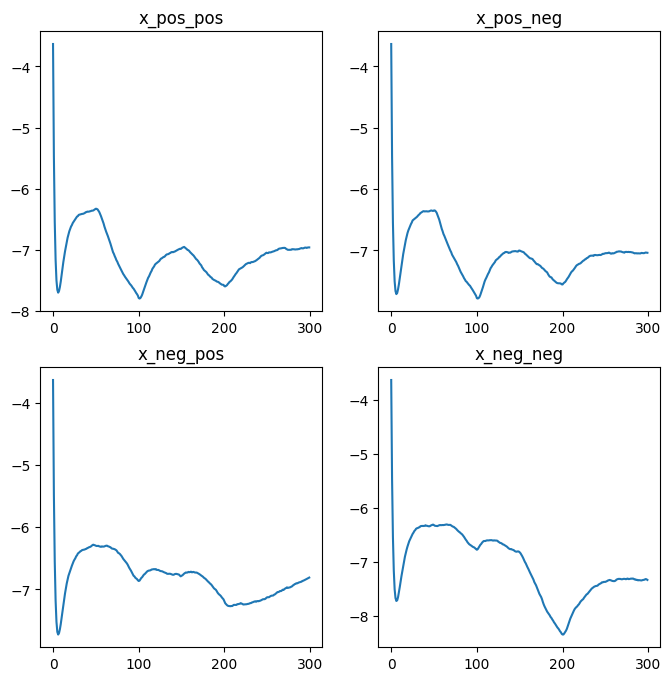

In [29]:
fig, axes = plt.subplots(2, 2, figsize = (8, 8))

sns.lineplot(x = np.arange(0, 300), y = x_all_samp_avg[1, 0, :], ax = axes[0, 0])
axes[0, 0].set_title('x_pos_pos')

sns.lineplot(x = np.arange(0, 300), y = x_all_samp_avg[1, 1, :], ax = axes[0, 1])
axes[0, 1].set_title('x_pos_neg')

sns.lineplot(x = np.arange(0, 300), y = x_all_samp_avg[1, 2, :], ax = axes[1, 0])
axes[1, 0].set_title('x_neg_pos')

sns.lineplot(x = np.arange(0, 300), y = x_all_samp_avg[1, 3, :], ax = axes[1, 1])
axes[1, 1].set_title('x_neg_neg')

# Specifically, plot of all neurons at the 300th timestep as X for a single sample of a single network

In [126]:
All_network_X.shape

(10, 4, 50, 200, 300)

Text(0.5, 1.0, 'x_neg_neg')

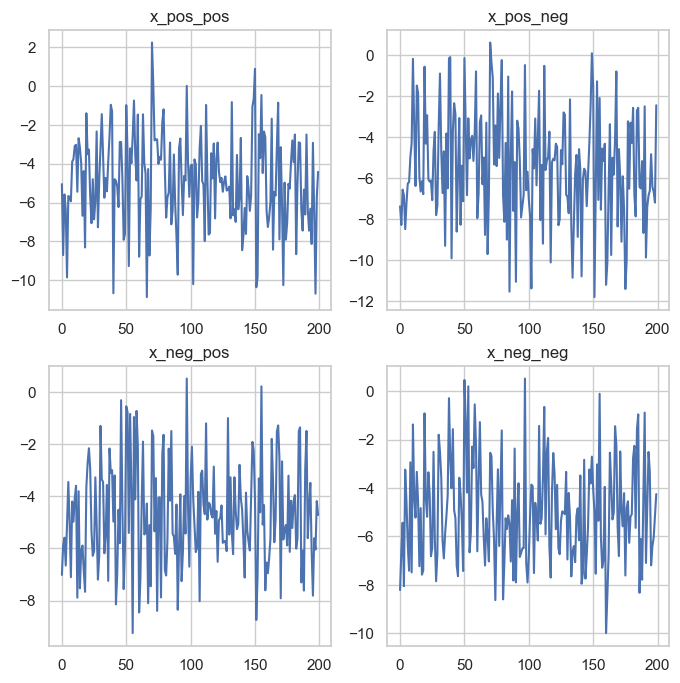

In [128]:
# show this in a grid and title each plot

fig, axes = plt.subplots(2, 2, figsize = (8, 8))

sns.lineplot(x = np.arange(0, 200), y = All_network_X[0, 0, 0, :, 299], ax = axes[0, 0])
axes[0, 0].set_title('x_pos_pos')

sns.lineplot(x = np.arange(0, 200), y = All_network_X[0, 1, 0, :, 299], ax = axes[0, 1])
axes[0, 1].set_title('x_pos_neg')

sns.lineplot(x = np.arange(0, 200), y = All_network_X[0, 2, 0, :, 299], ax = axes[1, 0])
axes[1, 0].set_title('x_neg_pos')

sns.lineplot(x = np.arange(0, 200), y = All_network_X[0, 3, 0, :, 299], ax = axes[1, 1])
axes[1, 1].set_title('x_neg_neg')

# Timesteps averaged across all neurons and samples (4, 200)

In [121]:
All_network_X.shape

(10, 4, 50, 200, 300)

In [124]:
x_all_samp_avg_t = np.average(All_network_X, axis=4)
x_all_samp_avg_t.shape
x_all_samp_avg_t = np.average(x_all_samp_avg_t, axis=2)
x_all_samp_avg_t.shape

(10, 4, 200)

Text(0.5, 1.0, 'x_neg_neg')

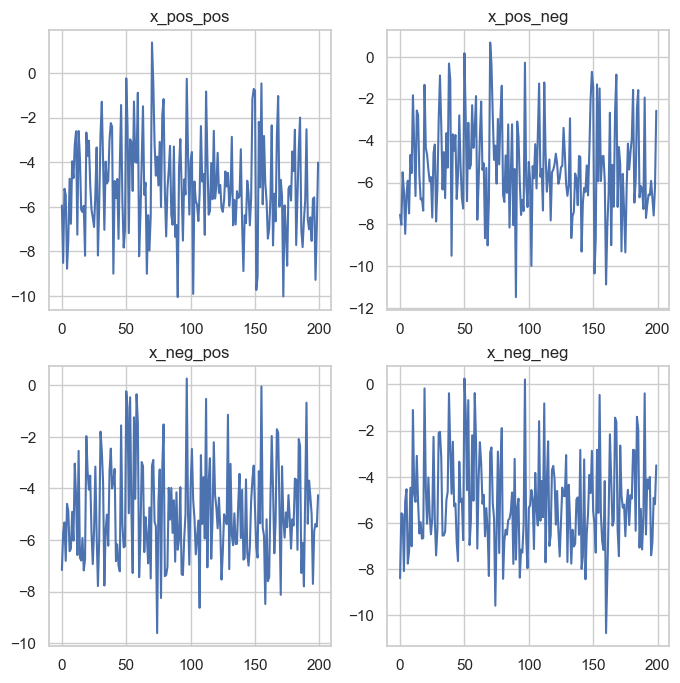

In [125]:
# show this in a grid and title each plot

fig, axes = plt.subplots(2, 2, figsize = (8, 8))

sns.lineplot(x = np.arange(0, 200), y = x_all_samp_avg_t[0, 0, :], ax = axes[0, 0])
axes[0, 0].set_title('x_pos_pos')

sns.lineplot(x = np.arange(0, 200), y = x_all_samp_avg_t[0, 1, :], ax = axes[0, 1])
axes[0, 1].set_title('x_pos_neg')

sns.lineplot(x = np.arange(0, 200), y = x_all_samp_avg_t[0, 2, :], ax = axes[1, 0])
axes[1, 0].set_title('x_neg_pos')

sns.lineplot(x = np.arange(0, 200), y = x_all_samp_avg_t[0, 3, :], ax = axes[1, 1])
axes[1, 1].set_title('x_neg_neg')

# Therefore, we can reduce the x dimention by averaging all neuron input at each timestep
# And Y as an average of last 50 timesteps

In [5]:
All_network_y.shape

(10, 4, 50, 300)

In [6]:
y_last_50_avg = All_network_y[:, :, :, -50:]
y_last_50_avg.shape

(10, 4, 50, 50)

In [7]:
y_last_50_avg = np.average(y_last_50_avg, axis=3)
y_last_50_avg.shape

(10, 4, 50)

In [8]:
y_last_50_avg = y_last_50_avg.reshape(y_last_50_avg.shape[0], -1)
y_last_50_avg.shape

(10, 200)

In [9]:
t = y_last_50_avg>0
t.shape
print(t[1])

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

In [10]:
# for every value in y_last_50_avg, if it is greater than 0, set it to 1, else set it to -1
y_last_50_avg[y_last_50_avg > 0] = 1
y_last_50_avg[y_last_50_avg < 0] = -1


In [11]:
y_last_50_avg[0]

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1

In [12]:
All_network_X.shape

(10, 4, 50, 200, 300)

In [13]:
x_nuron_avg = np.average(All_network_X, axis=3)
x_nuron_avg.shape

(10, 4, 50, 300)

In [14]:
x_nuron_avg = x_nuron_avg.reshape(10, 4*50, 300)

In [15]:
x_nuron_avg.shape

(10, 200, 300)

<Axes: >

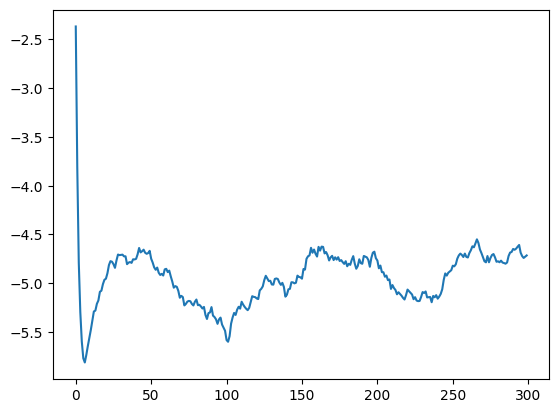

In [17]:
# confirming
# plot one x_nuron_avg
import seaborn as sns

sns.lineplot(x = np.arange(0, 300), y = x_nuron_avg[0, 100, :])

# So finally, x -> (10 models, 200 samples, 300 features0), y = (10 models, 200 outputs)

In [18]:
import os, sys; sys.path.append(os.path.abspath('../'))
# Importing the required packages
from inspector.rsa import ESM as fixed_ESM

In [19]:
def digest_and_score(X, y):
    netrep_metric = fixed_ESM(verbose = True)
    ingestion_report = netrep_metric.ingest(X, y, preprcessed = False)
    digestion_report = netrep_metric.digest()
    energy_distance = netrep_metric.score()
    netrep_metric.plot()
    return energy_distance

In [20]:
y_last_50_avg.shape

(10, 200)

In [21]:
np.unique(y_last_50_avg)

array([-1.,  1.])

for network 0| class 0 | found:  100 samples
for network 0| class 1 | found:  100 samples
for network 1| class 0 | found:  100 samples
for network 1| class 1 | found:  100 samples
for network 2| class 0 | found:  100 samples
for network 2| class 1 | found:  100 samples
for network 3| class 0 | found:  99 samples
for network 3| class 1 | found:  101 samples
for network 4| class 0 | found:  100 samples
for network 4| class 1 | found:  100 samples
for network 5| class 0 | found:  100 samples
for network 5| class 1 | found:  100 samples
for network 6| class 0 | found:  99 samples
for network 6| class 1 | found:  101 samples
for network 7| class 0 | found:  100 samples
for network 7| class 1 | found:  100 samples
for network 8| class 0 | found:  99 samples
for network 8| class 1 | found:  101 samples
for network 9| class 0 | found:  100 samples
for network 9| class 1 | found:  100 samples
Minimum samples per class over all networks found: 99
Succesfully sliced the networks: (2, 99, 300)
Suc

100%|██████████| 45/45 [05:15<00:00,  7.02s/it]


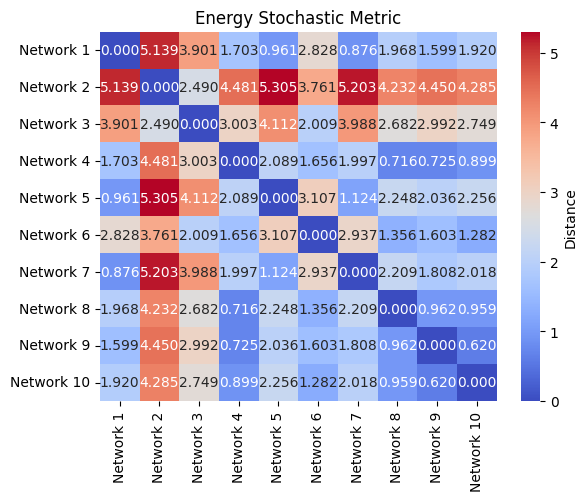

In [22]:
energy_distance = digest_and_score(x_nuron_avg, y_last_50_avg)